# Refractive Index

This notebook plots the refractive index of lithium niobate at terahertz and optical
frequencies fitted using data from Palik et al.

## Optical refractive index

In [1]:
# For relative imports
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import numpy as np
import n_opt

data = np.loadtxt("../data/n_vs_l_opt.csv", delimiter="\t", skiprows=1).T

# Extract data from text file
lam = data[0]
n_o_l = data[1]
n_e_l = data[2]


def calc_r2(yfit, ydata):
    residuals = ydata - yfit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata)) ** 2)
    return 1 - ss_res / ss_tot


# Compute r^2 for the fits
i, j = n_opt.range_by_value(lam, 0.25, 3.0)
no_r2 = calc_r2(n_opt.n_o(lam[i:j]), n_o_l[i:j])
ne_r2 = calc_r2(n_opt.n_e(lam[i:j]), n_e_l[i:j])

print("Fit r^2:")
print(f"\tn_o: {no_r2:0.4f}")
print(f"\tn_e: {ne_r2:0.4f}")

Fit r^2:
	n_o: 0.9977
	n_e: 0.9910


In [2]:
print("For lambda=1.55um:")
print(f"\tn_o={n_opt.n_o(1.55):0.4f}")
print(f"\tn_e={n_opt.n_e(1.55):0.4f}\n")

print("For lambda=0.8um:")
print(f"\tn_o={n_opt.n_o(0.8):0.4f}")
print(f"\tn_e={n_opt.n_e(0.8):0.4f}\n")

For lambda=1.55um:
	n_o=2.2088
	n_e=2.1390

For lambda=0.8um:
	n_o=2.2454
	n_e=2.1669



## Terahertz refractive index

In [3]:
import n_thz
from scipy.constants import c

data = np.loadtxt("../data/n_vs_l_thz.csv", delimiter="\t", skiprows=1).T

lam_thz = data[0]
fm_thz = c / np.flip(lam_thz) * 1e-6
n_o_l_thz = np.flip(data[1])
n_e_l_thz = np.flip(data[2])

In [4]:
print("For f_thz=100GHz:")
print(f"\tn_o={n_thz.n_o(0.1):0.4f}")
print(f"\tn_e={n_thz.n_e(0.1):0.4f}\n")

print("For f_thz=1THz:")
print(f"\tn_o={n_thz.n_o(1):0.4f}")
print(f"\tn_e={n_thz.n_e(1):0.4f}\n")

For f_thz=100GHz:
	n_o=6.6100
	n_e=5.0600

For f_thz=1THz:
	n_o=6.7496
	n_e=5.1098



## Plotting

Plot the fitted terahertz and optical refractive indices

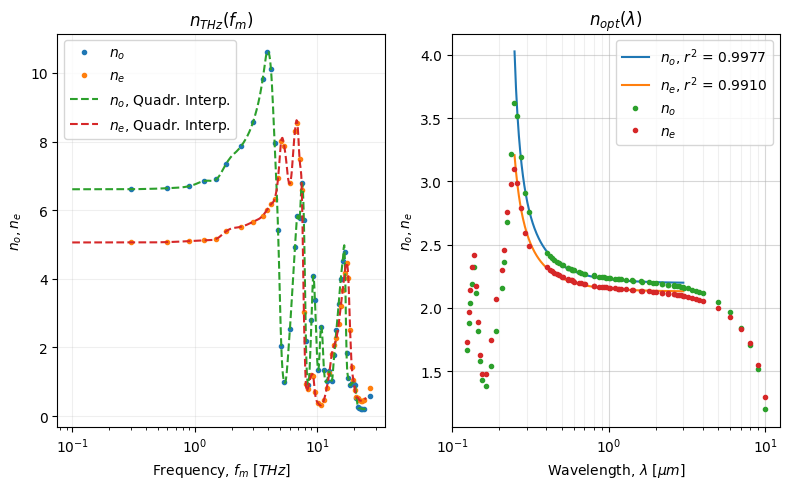

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 5))

x = np.logspace(-1, 1.4, 500)
no = [n_thz.n_o(i) for i in x]
ne = [n_thz.n_e(i) for i in x]

ax[0].set_title(r"$n_{THz}(f_m)$")
ax[0].plot(fm_thz, n_o_l_thz, ".", label=r"$n_o$")
ax[0].plot(fm_thz, n_e_l_thz, ".", label=r"$n_e$")
ax[0].plot(x, no, "--", label=r"$n_o$, Quadr. Interp.")
ax[0].plot(x, ne, "--", label=r"$n_e$, Quadr. Interp.")
ax[0].set_xlabel(r"Frequency, $f_m$ [$THz$]")
ax[0].set_ylabel(r"$n_o, n_e$")
ax[0].set_xscale("log")
ax[0].grid("major", alpha=0.5)
ax[0].grid("minor", alpha=0.2)
ax[0].legend()

x = np.linspace(0.25, 3.0, 1000)

ax[1].set_title(r"$n_{opt}(\lambda)$")
ax[1].plot(x, n_opt.n_o(x), label=r"$n_o$, $r^2$ = {:.4f}".format(no_r2))
ax[1].plot(x, n_opt.n_e(x), label=r"$n_e$, $r^2$ = {:.4f}".format(ne_r2))
ax[1].plot(lam, n_o_l, ".", label=r"$n_o$")
ax[1].plot(lam, n_e_l, ".", label=r"$n_e$")
ax[1].set_xlabel(r"Wavelength, $\lambda$ [$\mu m$]")
ax[1].set_ylabel(r"$n_o, n_e$")
ax[1].set_xscale("log")
ax[1].legend(loc=0)
ax[1].grid(which="major", alpha=0.5)
ax[1].grid(which="minor", alpha=0.2)

plt.tight_layout()
plt.show()